# パラメータ表示された曲線
## 曲線のパラメータ表示
今までは方程式で表される図形の形を見てきました。たとえば、

```{admonition} 定義／曲線のパラメータ表示
平面上を動く点を考え、その時刻$t$における点の座標を$(x(t),y(t))$としたときに、この動点の軌跡で表される曲線を**パラメータ表示された曲線**という。
```
実際に例を見てみよう。まず、半径$r$の円のパラメータ表示は
$$
\begin{pmatrix}
        x \\ y
    \end{pmatrix}
    =
    r
    \begin{pmatrix}
        \cos \theta \\
        \sin \theta
    \end{pmatrix}
$$
になります。さらに、楕円については、その横の比率を与える変数を与えれば良いので、
$$
\begin{pmatrix}
        x \\ y
    \end{pmatrix}
    =
    \begin{pmatrix}
        a\cos \theta \\
        b\sin \theta
    \end{pmatrix}
$$
のようになりますね。

ここでポイントとなるのは...

とりあえず、一度書いてみましょう。
下は$a,b$の値を複数変えた楕円です。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import matplotlib.animation
import matplotlib.colors
from IPython.display import HTML

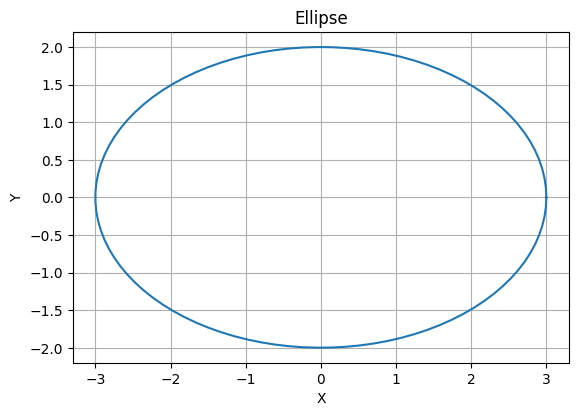

In [ ]:
# ここを書き換えてください。
a = 3 # x方向の大きさ
b = 2 # y方向の大きさ

def draw_ellipse(a, b, angle, center=(0, 0)):
    # Create an array of angles
    theta = np.linspace(0, 2 * np.pi, 100)

    # Parametric equations for ellipse
    x = a * np.cos(theta)
    y = b * np.sin(theta)

    # Rotate the ellipse by the specified angle
    x_rot = x * np.cos(angle) - y * np.sin(angle)
    y_rot = x * np.sin(angle) + y * np.cos(angle)

    # Translate the ellipse to the specified center
    x_rot += center[0]
    y_rot += center[1]

    # Plotting
    plt.plot(x_rot, y_rot)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ellipse")
    plt.grid(True)
    plt.show()

# Example usage with parameters a=3, b=1, angle=45 degrees, center at (0, 0)
draw_ellipse(a, b, 0)

## 媒介変数表示
### サイクロイドの例
サイクロイドの媒介変数表示は次のようになっていました。
\begin{equation*}
    \begin{cases}
        x = a(\theta - \sin \theta) & \\
        y= a(1-\cos \theta) &
    \end{cases}
\end{equation*}
これを$\theta$の変化がわかるように描くと次の図のようになります。

In [ ]:
# aの値
a = 0.5

## 描画の細かさ (θの幅指定。細かくしたければここの値を小さくすれば良いです)
stp = 0.2

# 極方程式
def f(x):
  return a * (x - np.sin(x)), a * (1 - np.cos(x))


# 円描画用theta
stp_line = 0.00001
circ_x, circ_y = coordinate(a, np.arange(0, 2 * np.pi, stp_line))
circ_y = circ_y + a

# サイクロイドアニメーション用
def step_cycloid(ax, artist_prev, theta):
    artist = []
    x, y = f(theta)
    artist_prev.extend(ax.plot(x, y, 'ro', alpha = 0.4))
    cx = circ_x + a * theta
    cy = circ_y

    c_center_x, c_center_y = a * theta, a
    artist.extend(artist_prev)
    artist.extend(ax.plot(c_center_x , c_center_y ,'ro' , alpha = 0.6))
    artist.extend(ax.plot(cx, cy, color='blue', alpha = 0.5))
    artist.append(ax.arrow(c_center_x, c_center_y, -a * np.sin(theta), -a * np.cos(theta), head_width=0.1, head_length=0.1,ec='green'))
    artist.append(ax.text(c_center_x, c_center_y, r"$\theta = {:.2f}$".format(theta), ha='right', color='black'))
    return artist

theta = np.arange(0, 3 * np.pi, stp_line)
thetas = np.arange(0, 3 * np.pi, stp)

# base figure
X,Y = f(theta)
fig, ax = plt.subplots()
ax.set_aspect('equal')

# animation drawing section
artists = []
artist_prev = []
for t in thetas:
  artists.append(step_cycloid(ax, artist_prev, t))

artists.append(draw_finish(ax, artist_prev, X, Y, pole='O'))

ani = matplotlib.animation.ArtistAnimation(fig, artists, interval=500)
html = ani.to_jshtml(default_mode='once')
plt.close(fig)
# ani.save('cycloid.gif')
HTML(html)

## パラメータ表示された曲線の例
### アステロイド
アステロイドは半径$a$の円$C_1$に、内接する半径$b$の中心の軌跡である。パラメータ表示すると、
$$
    \begin{pmatrix}
        x \\ y
    \end{pmatrix}
    =
    \begin{pmatrix}
        a\cos ^3 \theta \\
        a\sin ^3\theta
    \end{pmatrix}
$$
になります。

In [ ]:
# following code cannot be executable
## 外周円の半径
"""
a_outer = 3

def ast(t):
  return a_outer * (np.cos(t)) ** 3, a_outer * (np.sin(t)) ** 3

def draw_step(h, ax, eta):
    artist = []
    xt, yt, gt = h['x'], h['fx'], h['gx']
    y0 = yt - xt * gt
    y10 = (10 - xt) * gt + yt

    lines = [
        [(0, y0), (10, y10)],
        [(xt, yt), (xt - gt * eta, yt)]
    ]
    lc = matplotlib.collections.LineCollection(lines, color=['b', 'g'], lw=1)
    artist.append(plt.gca().add_collection(lc))
    artist.append(plt.vlines([xt], 0, 10, "red", linestyles='dashed', label=r"$x$"))
    artist.extend(ax.plot([xt], [yt], 'ro'))
    artist.append(ax.text(xt - gt * eta * 0.5, yt + 0.3, "${:.5f}$".format(gt * eta), ha='center'))
    artist.append(ax.text(xt + 0.2, yt - 0.5, str(xt)))
    return artist


t = np.linspace(0, 2*np.pi, 1000)

fig, ax = plt.subplots(dpi=100, figsize=(6, 6))
ax.plot(x, f(x), 'black')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.grid()

artists = []
for h in H:
    artists.append(draw_step(h, ax, eta=0.5))

ani = matplotlib.animation.ArtistAnimation(fig, artists, interval=500)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)
"""